<a href="https://colab.research.google.com/github/kyumitg/MITG/blob/master/KY_MAI_Class/KaggleKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno


%matplotlib inline

<ipython-input-1-a06797939b58>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# 1. 데이터 셋 확인

In [ ]:
#데이터 불러오기

os.listdir("./")

df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

df_train.shape, df_test.shape

((891, 12), (418, 11))

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 타이타닉 데이터 Feature 설명

survival - 생존유무, target 값. (0 = 사망, 1 = 생존)

pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)

sex - 성별

Age - 나이(세)

sibsp - 함께 탑승한 형제자매, 배우자 수 총합

parch - 함께 탑승한 부모, 자녀 수 총합

ticket - 티켓 넘버

fare - 탑승 요금

cabin - 객실 넘버

bembarked - 탑승 항구

In [ ]:
#각 Feature types

df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#학습 데이터 결측치(Null Data) 확인

df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [ ]:
#테스트 데이터 결측치(Null Data) 확인

df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

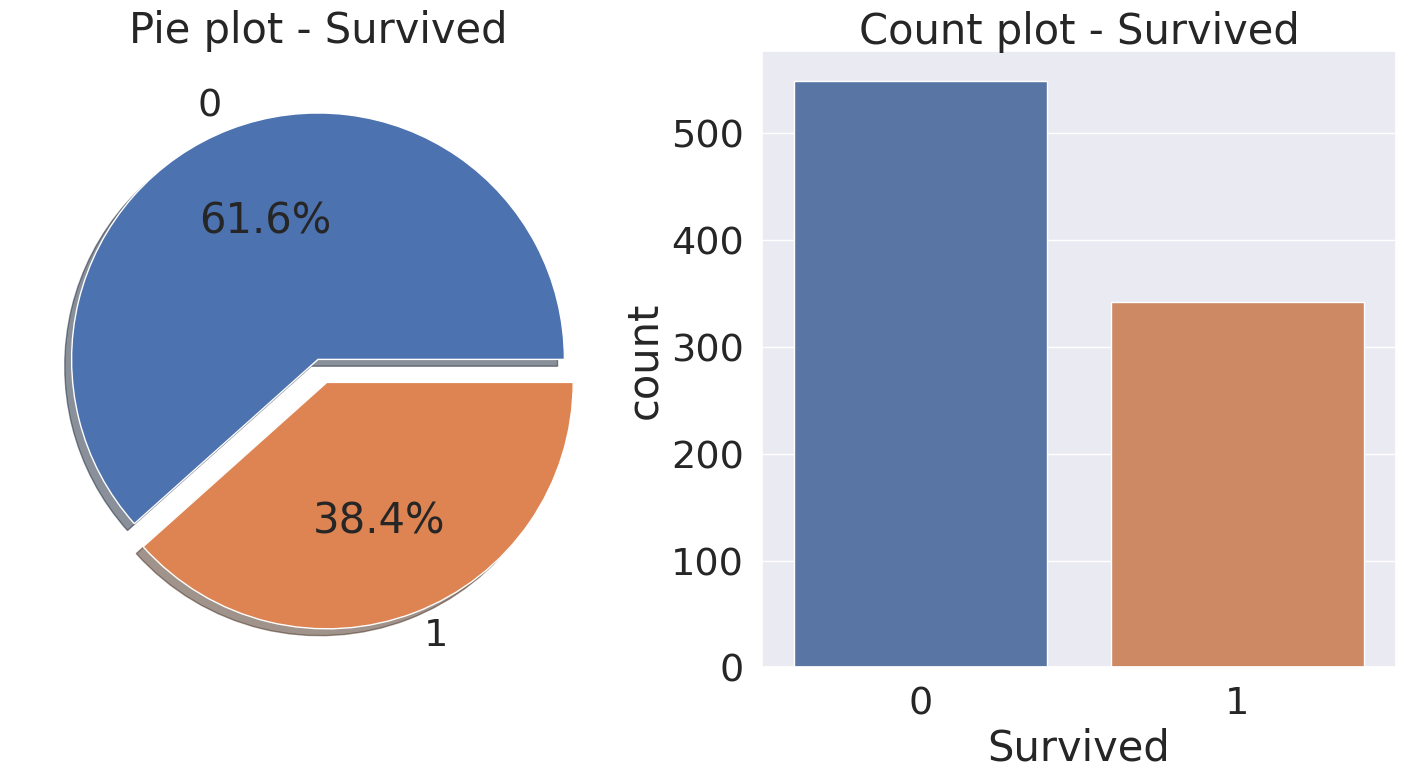

In [ ]:
#Target Label, Survived 확인

f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)

## 2.1 Pcalss(티켓 클래스 1 = 1st, 2 = 2nd, 3 = 3rd)

Survived    0    1  All
Pclass                 
1          80  136  216
2          97   87  184
3         372  119  491
All       549  342  891
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


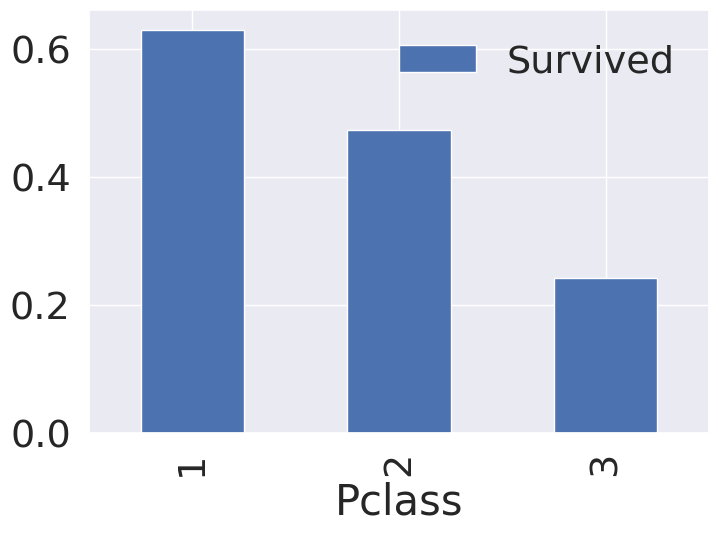

In [ ]:
#티켓 클래스별 생존자/ 사망자수. (1 = 1st, 2 = 2nd, 3 = 3rd)

p_Survived = pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

p_Survived_rate = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

print(p_Survived)
print(p_Survived_rate)

## 2.2 Sex(성별)

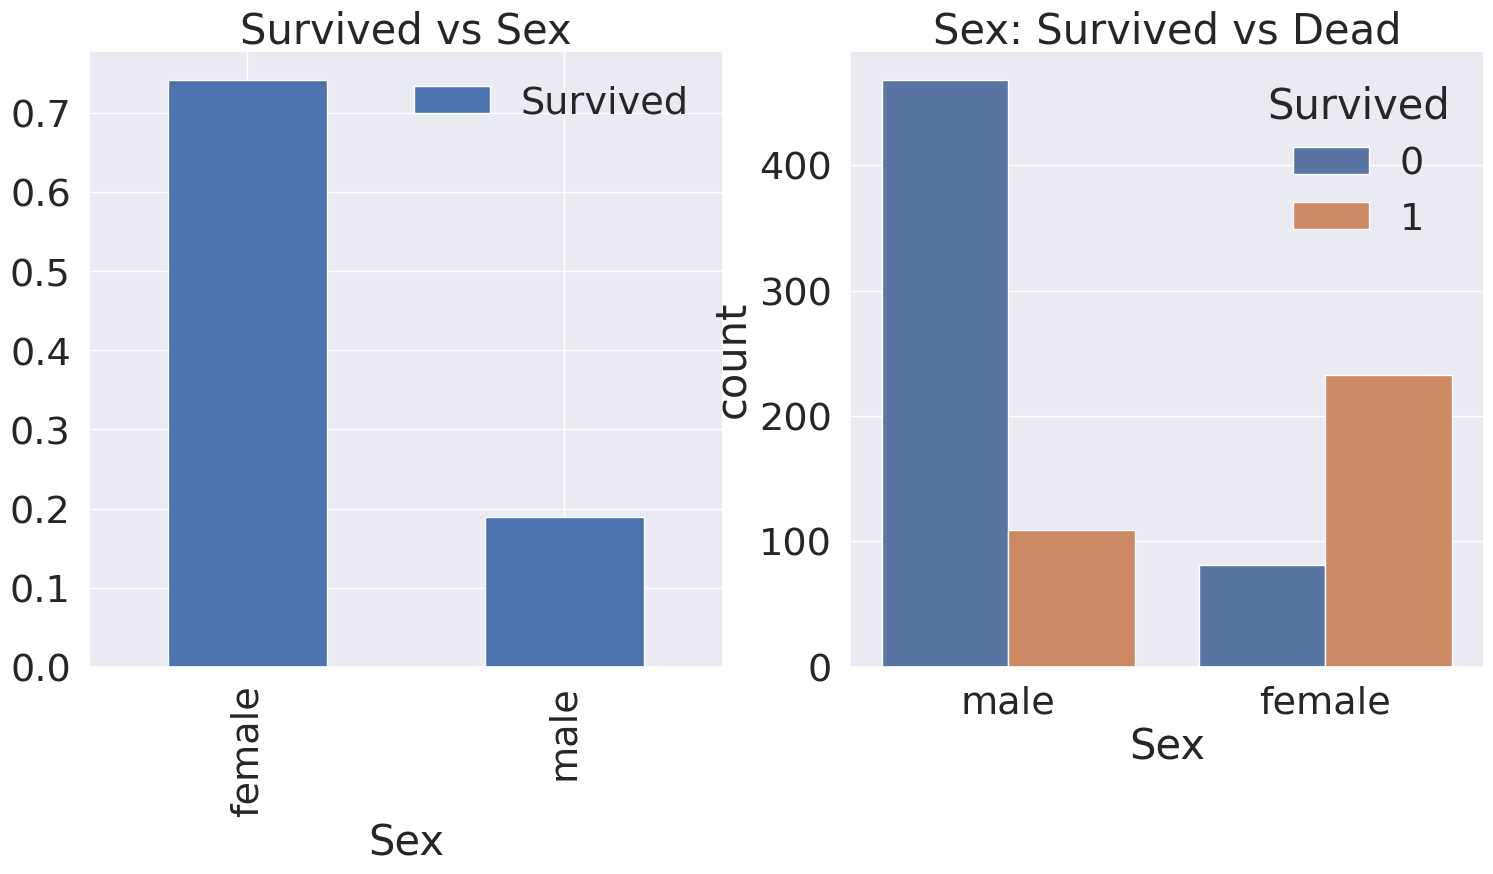

In [ ]:
#성별 생존자 / 사망자수.

f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

## 2.3 Age(연령별)

In [ ]:
#연령별 탑승객.

print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


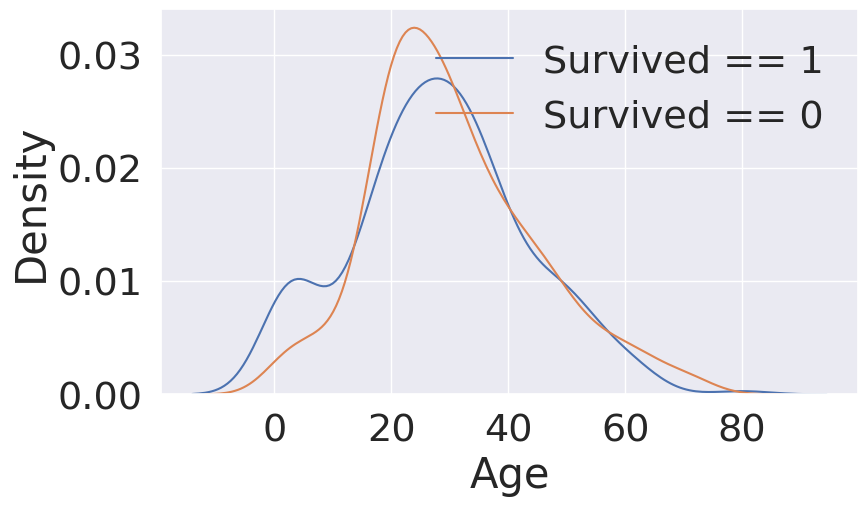

In [ ]:
#연령별 생존자 / 사망자수.

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

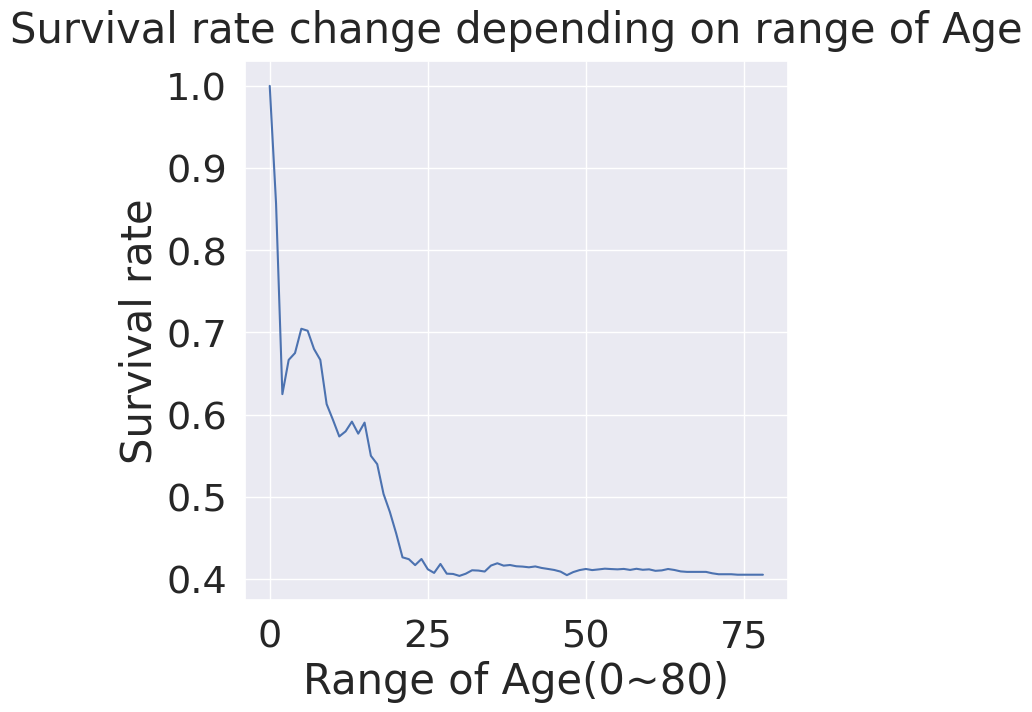

In [ ]:
#연령별 누적 생존 확률

cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~80)')
plt.show()

### 지금까지 얻은 분석을 종합하자면,

#### * 여자이거나
#### * 나이가 어리고,
#### * 티켓 클래스가 높을 수록
    
### 생존확률이 높음

## 2.4 Embarked(탑승 항구)

In [ ]:
set(list(df_train['Embarked']))

{'C', 'Q', 'S', nan}

<Axes: xlabel='Embarked'>

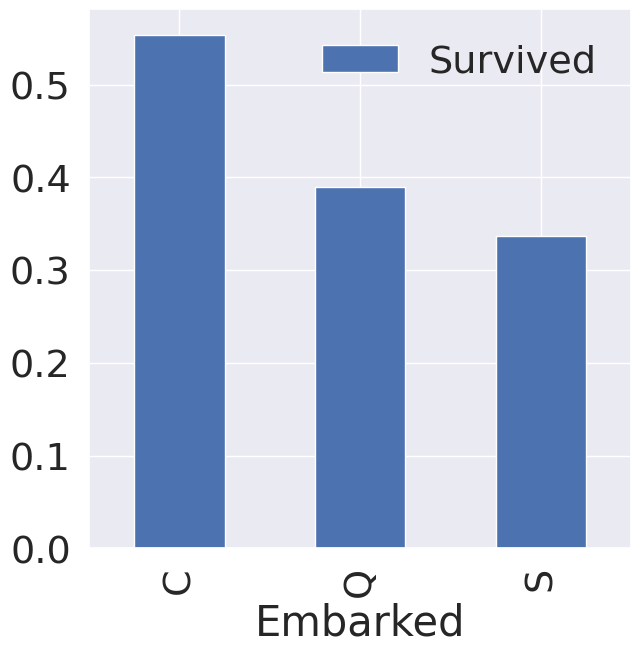

In [ ]:
#탑승 항구별 생존 확률
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

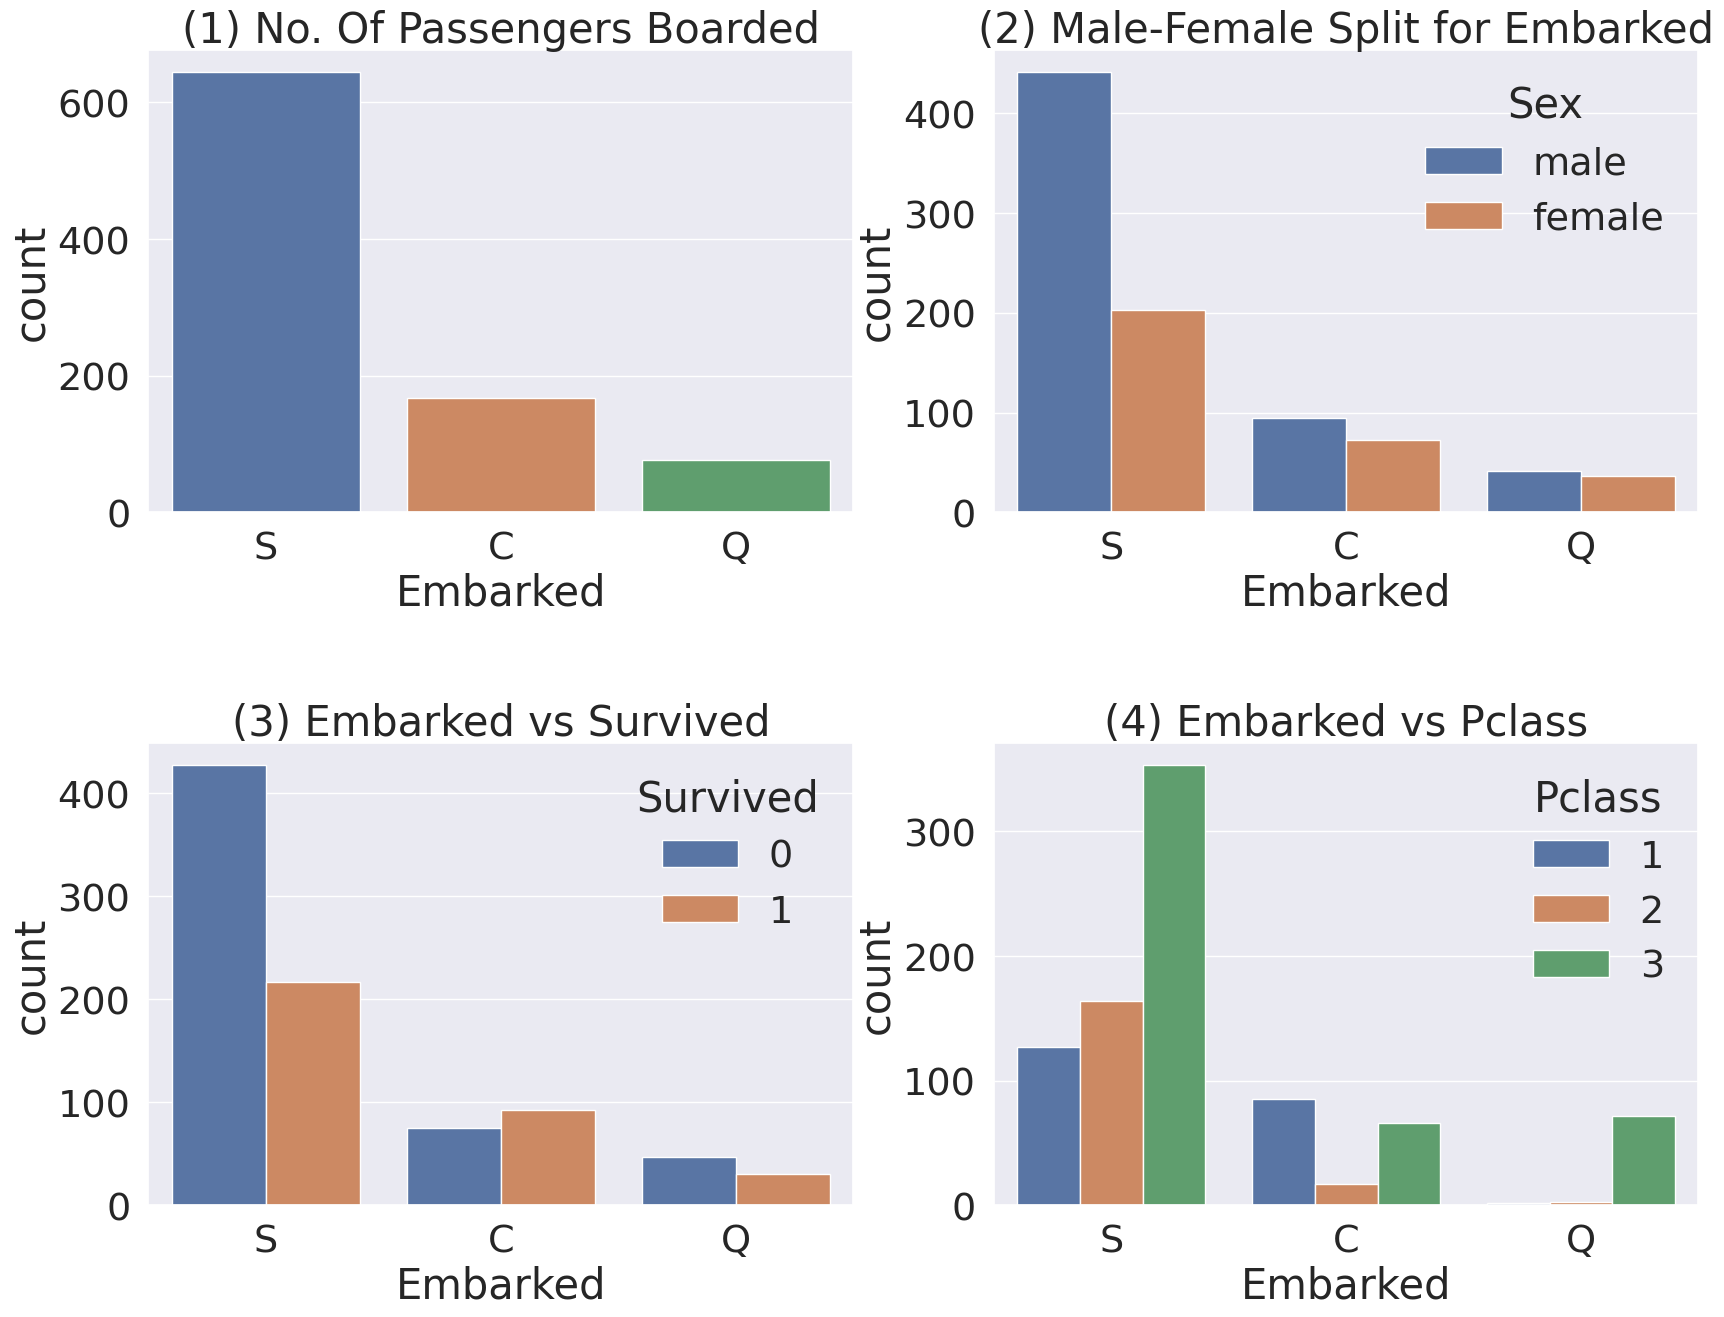

In [ ]:
#다른 데이터와의 상관 관계

f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### * Figure(1) - 전체적으로 봤을 때, S 에서 가장 많은 사람이 탑승
#### * Figure(2) - C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많음
#### * Figure(3) - 생존확률이 S 경우 많이 낮은 걸 볼 수 있음
#### * Figure(4) - C가 생존확률이 높은건 클래스가 높은 사람이 많이 탑승했으며, S는 3rd class 가 많아서 생존확률이 낮게 측정됨

## 2.5 Family - SibSp(형제 자매) + Parch(부모, 자녀)

#### * SibSp와 Parch를 합치면 함께 탑승한 가족의 수가 될 것
#### * 이 두 피쳐를 더해서 새로운 피쳐 FamilySize를 추가

In [ ]:
#FamilySize 분석

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


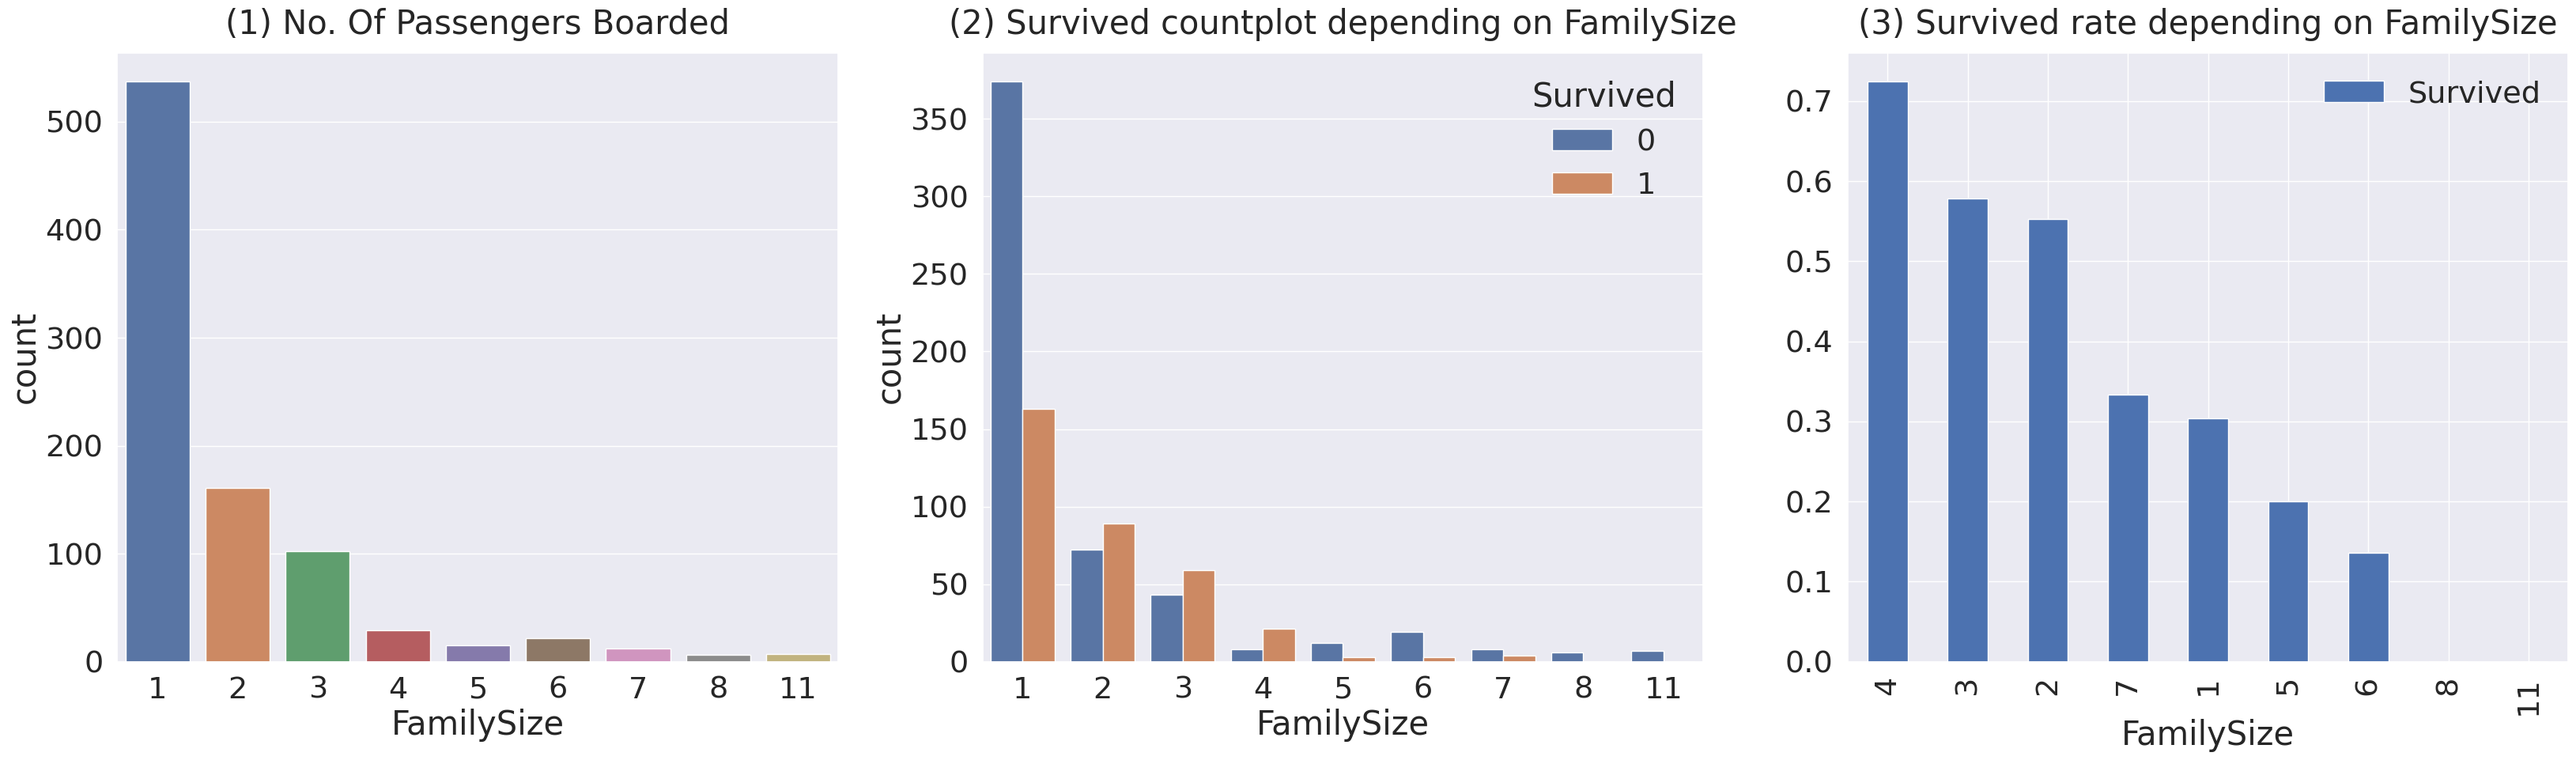

In [ ]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x = 'FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

#### * Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있음. 대부분 1명이고 그 다음으로 2, 3, 4명
#### * Figure (2), (3) - 가족 크기에 따른 생존비교. 가족이 4명인 경우가 가장 생존확률이 높음
#### * 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아짐
#### * 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작음. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있음

## 2.6 Fare(탑승 요금)

<ipython-input-20-5383113f9c15>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)


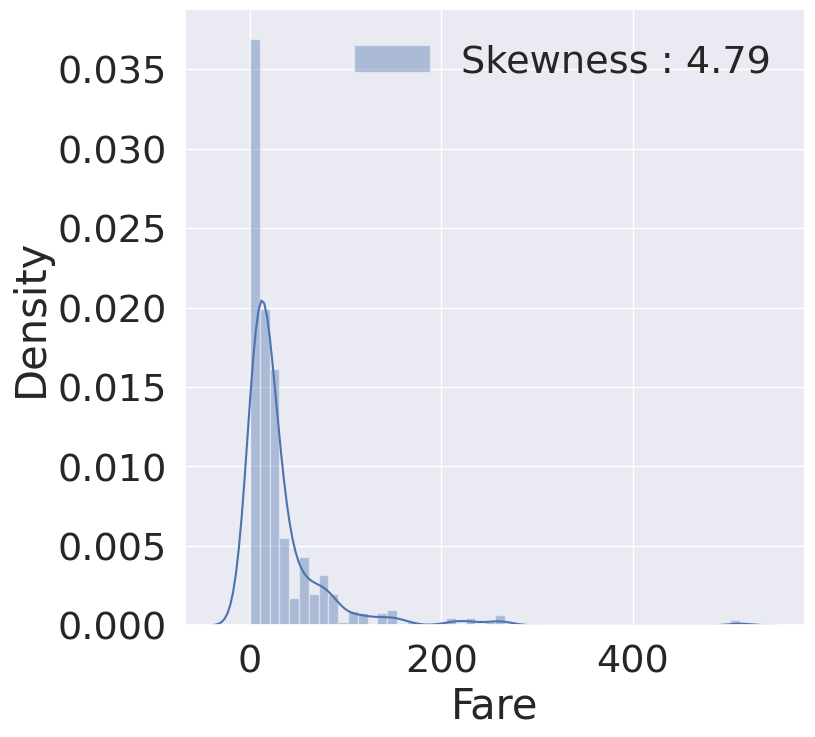

In [ ]:
#탐승 요금 별 데이터 분포

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

<ipython-input-21-d15d698986a1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)


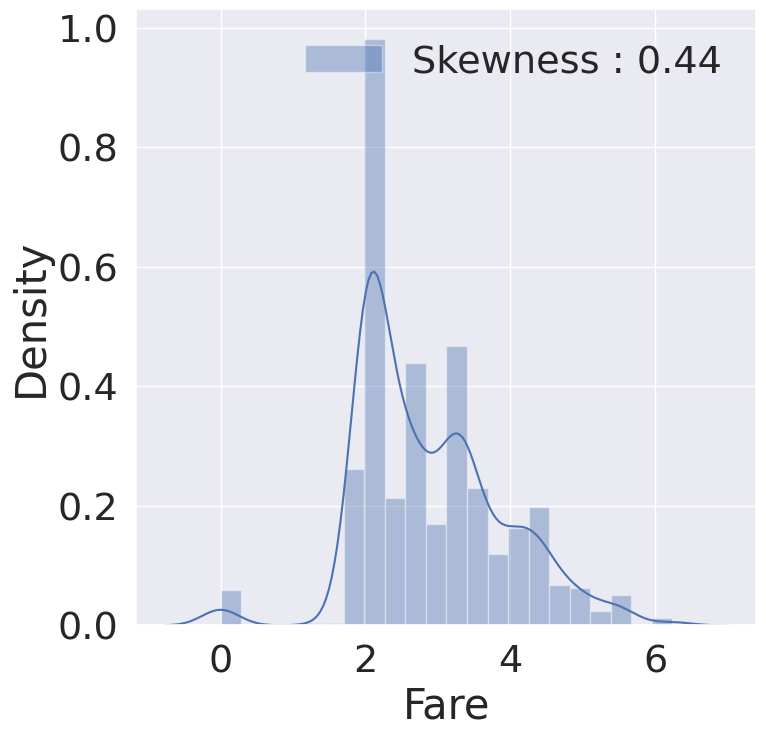

In [ ]:
#탑승 요금 별 데이터 분포(데이터 전처리를 통해 비대칭성 제거(log 사용))

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.7 Cabin(객실 넘버)

In [ ]:
### Cabin 피쳐의 Null 비율 계산

df_train["Cabin"].isnull().sum() / df_train.shape[0]

0.7710437710437711

#### * 이 feature 는 NaN 이 77% 이므로, 생존에 영향을 미칠 중요한 정보를 얻을 수 없음.
#### * 그러므로 모델 입력 데이터에 포함시키지 않음.

## 2.8 Ticket

In [ ]:
print(df_train['Ticket'].value_counts())

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


#### * 이 feature는 매우 다양하므로(681개의 Value) 중요한 정보를 얻는 것은 어려움.
#### * 그러므로 모델 입력 데이터에 포함시키지 않음.

# 3. 특성 공학 (Feature Engineering)

#### * dataset 에 존재하는 null data 문제
#### * null data 를 포함하는 feature 의 statistics 를 참고하여 해결

## 3.1 Fill Null

### 3.1.1 Fill Null in Age using title

In [ ]:
#Age에 존재하는 null data

df_train["Age"].isnull().sum()

177

#### * title + statistics 를 사용
#### * 영어에서는 Miss, Mrr, Mrs 같은 title이 존재
#### * 각 탑승객의 이름에는 꼭 이런 title 이 들어감

In [ ]:
# data를 string으로 변환 : str method, 정규표현식 적용 : extract method를 사용
# title 추출 후Initial column에 저장 진행

df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [ ]:
#추출한 Initial 과 Sex 간의 count 확인

pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
#추출한 Initial을 5가지 라벨로 통일

df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)


In [ ]:
# null 값을 채우기 위해 호칭에 따라 평균 값 채우기

df_train.groupby('Initial').mean()

<ipython-input-28-569d075cdece>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby('Initial').mean()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [ ]:
# 각 initial 그룹별 Age 평균 값을 사용

df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

### 3.1.2 Fill Null in Embarked

In [ ]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


#### * Embarked 는 Null value 가 2개이고, S 에서 가장 많은 탑승객이 있었으므로,
#### 간단하게 Null 을 S로 채움

In [ ]:
#dataframe 의 fillna method 를 이용

df_train['Embarked'].fillna('S', inplace=True)

## 3.2. Change Age(continuous to categorical)

#### * Age를 그대로 사용해도 모델학습이 가능 하지만, 몇개의 group 으로 나누어 진행

In [ ]:
# Age를 연령별로 나누어 categorical 그룹화 진행

def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

## 3.3 Change Initial, Embarked and Sex (string to numerical)

#### * 현재 Initial 은 Mr, Mrs, Miss, Master, Other 총 5개
#### * string 데이터를 모델에 인풋할 때, 효율적인 계산을 위해 수치화 진행

In [ ]:
# 이니셜 카테고리 수치화

df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

# Embarked 카테고리 수치화

df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 성별 카테고리 수치화

df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

## 3.4 feature 상관관계 확인

#### * -1 or 1로 갈수록 데이터 간 상관관계가 높다는 것을 의미
#### * 0은 상관관계가 없다는 것을 의미

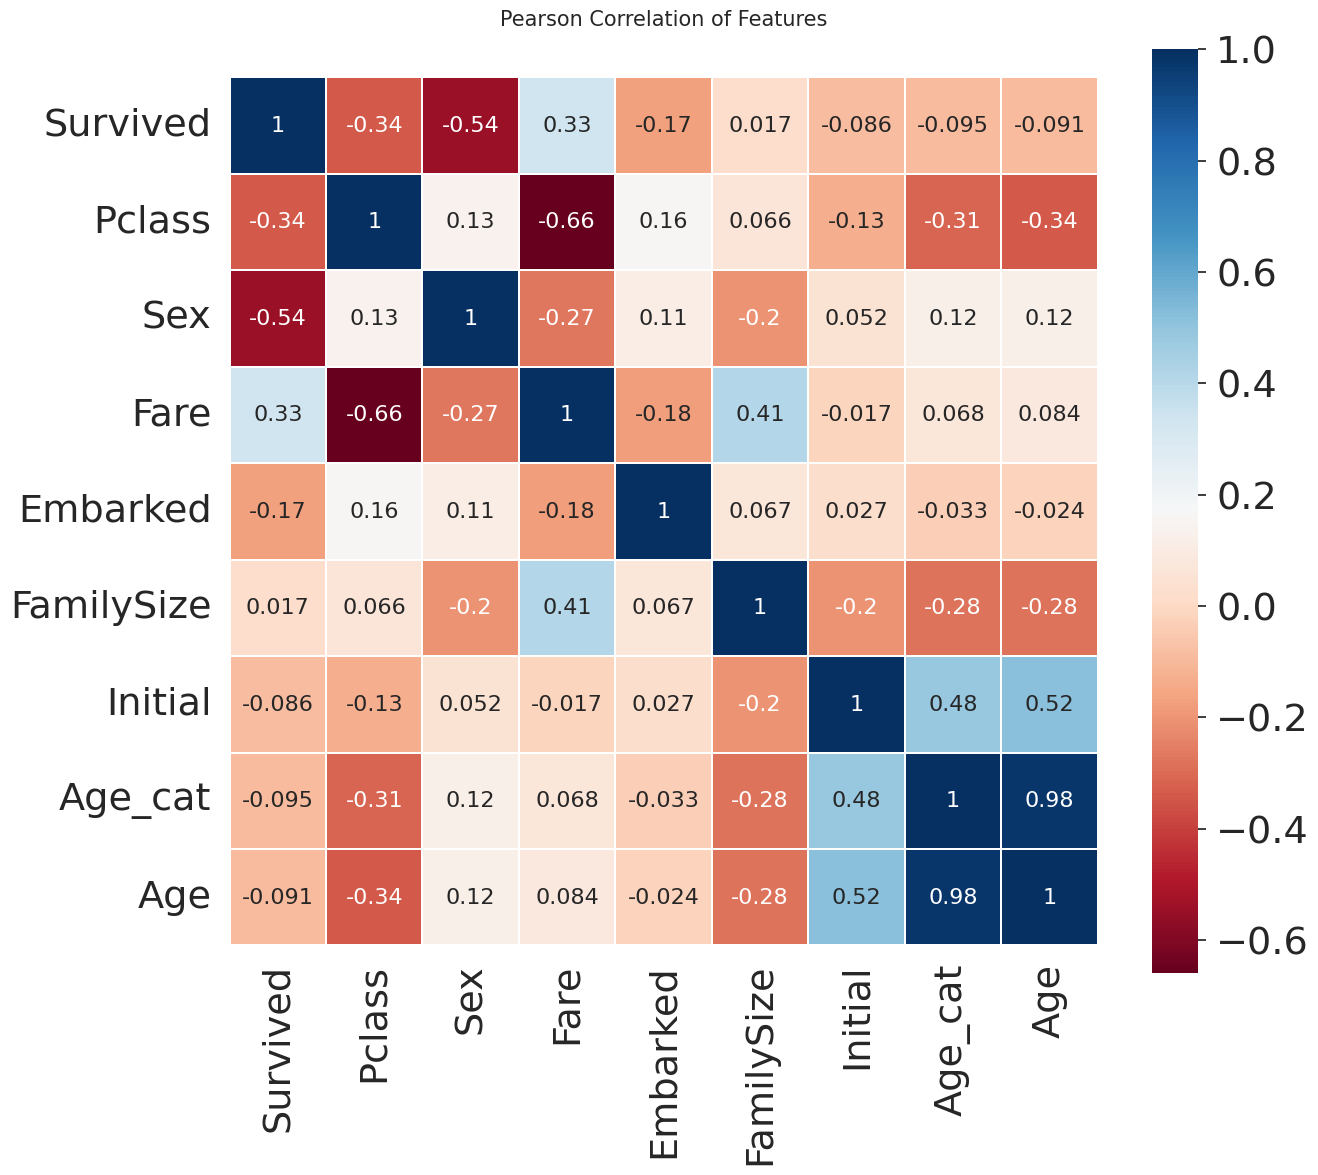

In [ ]:
# 각 feature 간의 상관관계 확인

heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

#### * EDA에서 살펴봤듯이, Sex 와 Pclass 가 Survived 에 상관관계가 어느 정도 있음

#### * fare 와 Embarked 도 상관관계가 존재

#### * 또한, 서로 강한 상관관계를 가지는 feature들이 없음
#### * 이것은 우리가 모델을 학습시킬 때, 불필요한 feature 가 없다는 것을 의미

## 3.5 One-hot encoding on Initial and Embarked

#### * 모델의 성능을 높이기 위해 one-hot encoding 진행
#### * 수치화는 간단히 Master == 0, Miss == 1, Mr == 2, Mrs == 3, Other == 4 로 매핑
#### * One-hot encoding 은 (0, 1) 로 이루어진 5차원의 벡터로 나타내는 것

In [ ]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,0.683603,...,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1.450832,...,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,0.727559,...,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,1.379314,...,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.735091,...,1,3,0,0,1,0,0,0,0,1


#### * Initial은 총 5개의 카테고리니, one-hot encoding을 하고 나면 새로운 5개의 column이 생김
#### * Embarked는 총 3개의 카테고리로 새로운 3개의 column이 생김

## 3.5 Drop columns

#### * 필요없는 feature 제거

In [ ]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,0.683603,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,1.450832,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,0.727559,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,1.379314,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,0.735091,1,3,0,0,1,0,0,0,0,1


# 4. 모델 개발 및 학습

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau

## 4.1 Split dataset into train, valid(dev), test set

In [ ]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

X_train.shape, X_test.shape

((891, 14), (418, 14))

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)
y_tr.shape, y_vld.shape

((712,), (179,))

## 4.2 Model generation and prediction

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(128,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
# 모델 체크포인트 지정 및 early stopping 설정

acc_checkpoint = keras.callbacks.ModelCheckpoint("disk_model8_acc.h5", monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)
early_stopping = EarlyStopping(monitor = 'val_accuracy', min_delta = 0, patience = 500, mode = 'auto')

In [ ]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=32,
                    epochs=3000,
                    validation_data=(X_vld, y_vld),
                    verbose=1,
                       callbacks = [acc_checkpoint,early_stopping]
                      )

Epoch 1/3000
18/23 [======================>.......] - ETA: 0s - loss: 0.9340 - accuracy: 0.5174
Epoch 1: val_accuracy improved from -inf to 0.65363, saving model to disk_model8_acc.h5
23/23 [==============================] - 6s 45ms/step - loss: 0.8973 - accuracy: 0.5197 - val_loss: 0.6668 - val_accuracy: 0.6536
Epoch 2/3000
 9/23 [==========>...................] - ETA: 0s - loss: 0.7436 - accuracy: 0.5243

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/23 [===========================>..] - ETA: 0s - loss: 0.7176 - accuracy: 0.5497
Epoch 2: val_accuracy did not improve from 0.65363
23/23 [==============================] - 0s 13ms/step - loss: 0.7138 - accuracy: 0.5520 - val_loss: 0.6471 - val_accuracy: 0.6480
Epoch 3/3000
23/23 [==============================] - ETA: 0s - loss: 0.6989 - accuracy: 0.5857
Epoch 3: val_accuracy did not improve from 0.65363
23/23 [==============================] - 0s 11ms/step - loss: 0.6989 - accuracy: 0.5857 - val_loss: 0.6539 - val_accuracy: 0.6480
Epoch 4/3000
22/23 [===========================>..] - ETA: 0s - loss: 0.6851 - accuracy: 0.5838
Epoch 4: val_accuracy did not improve from 0.65363
23/23 [==============================] - 0s 11ms/step - loss: 0.6884 - accuracy: 0.5829 - val_loss: 0.6558 - val_accuracy: 0.6480
Epoch 5/3000
20/23 [=========================>....] - ETA: 0s - loss: 0.6717 - accuracy: 0.5813
Epoch 5: val_accuracy did not improve from 0.65363
23/23 [============================

In [ ]:
prediction = nn_model.predict(X_vld)

preds_1d = prediction.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) #0.5보다크면 1, 작으면 0


6/6 [==============================] - 0s 3ms/step


In [ ]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(pred_class, y_vld)))

총 179명 중 84.36% 정확도로 생존을 맞춤


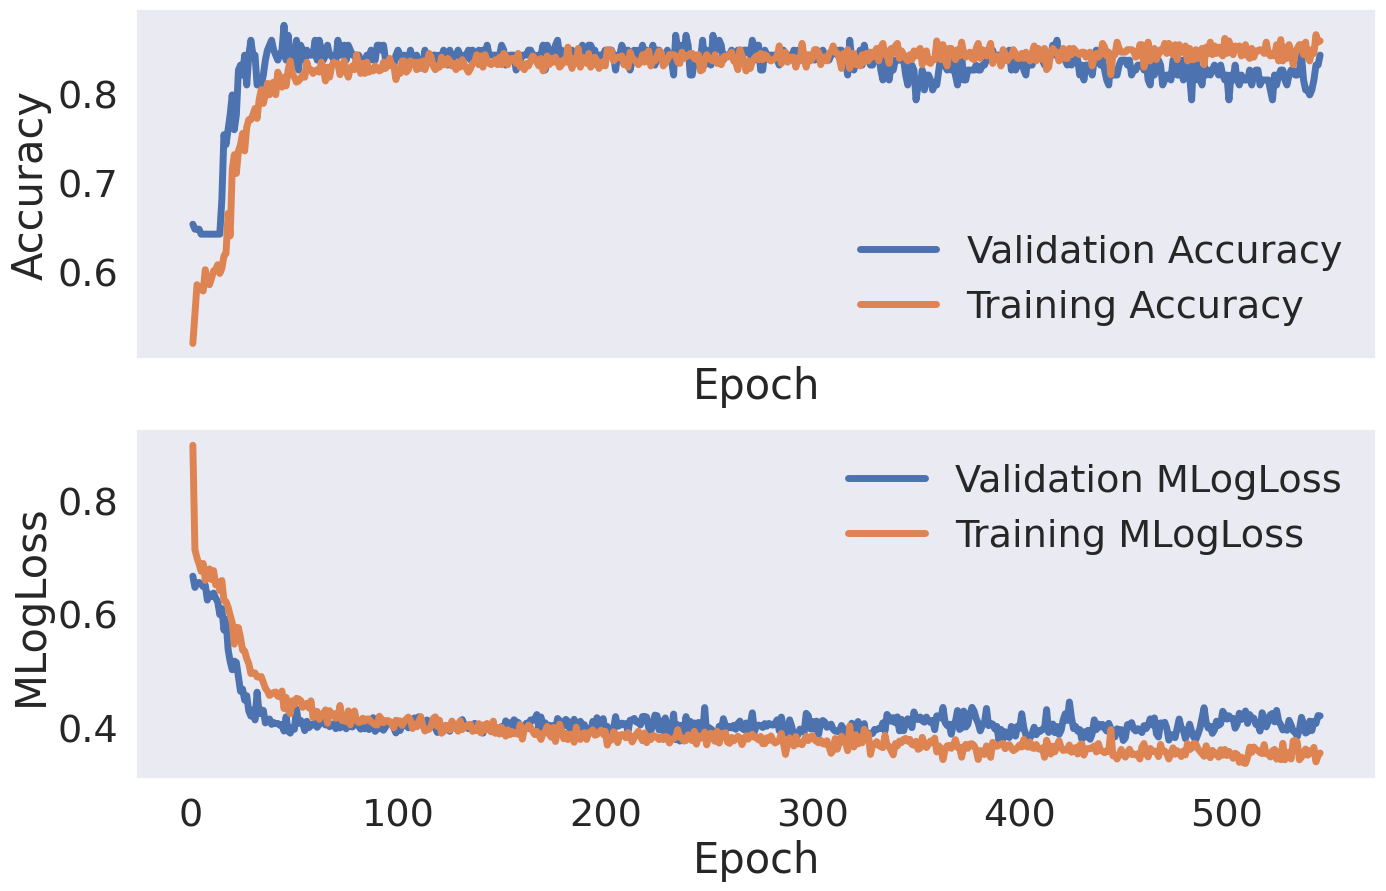

In [ ]:
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
fig.savefig('hist.png', dpi=300)
plt.show();

# 5. Model 평가 및 결과 제출

In [ ]:
submission = pd.read_csv('./sample_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]
prediction.shape

14/14 [==============================] - 0s 3ms/step


<ipython-input-55-064ace028b3d>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction = prediction.astype(np.int)


(418,)

In [ ]:
submission['Survived'] = prediction
submission.to_csv('my_nn_submission.csv', index=False)